The earth faces tremendous risk of possible collision with asteroids from the solar-system. A continuos monitoring program by NASA's Sentry program is one of the initiatives to observe and catalogue potentially dangerous asteroids on collision course with the earth. These notebook will focus on optimal analysis and classification of Near-Earth Asteroids (NEAs) 

First, we import necessary libraries to help in the analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
import cv2                       #For displaying jpeg and png pictures
import pylab as pl               # For plotting multiple graphs
from pandas import DataFrame
from sklearn.cluster import KMeans

#### Introduction of the analysis

First lets have a look at how asteroids look like

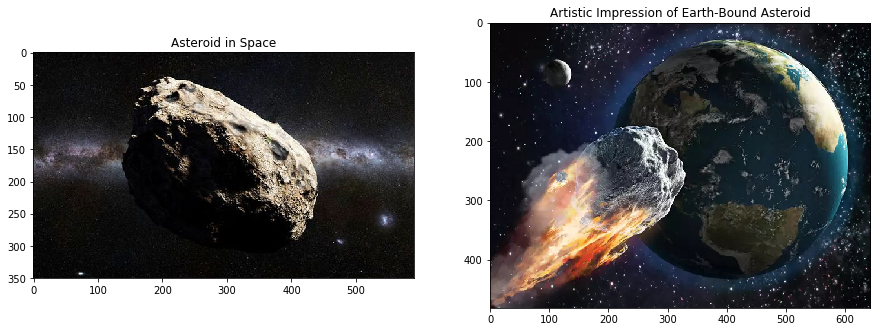

In [2]:
pl.figure(figsize=(15, 10)) #Set the sizes of the plotting space
pl.subplot(122)  # First plot
ae=cv2.imread('aest.webp') # Read the image from the source
pl.title('Artistic Impression of Earth-Bound Asteroid') # Title of the image
pl.imshow(cv2.cvtColor(ae,cv2.COLOR_BGR2RGB))  # Show the coloured image
pl.subplot(121) # Second plot
Asteroid = cv2.imread('ast.jpg') # Read the image from the source
pl.title('Asteroid in Space')  # Title of the image
pl.imshow(cv2.cvtColor(Asteroid, cv2.COLOR_BGR2RGB)) # Show the coloured image in both three bands

Next,lets import our dataset of our data titled 'impacts' and assign it a variable.

In [3]:

impacts=pd.read_csv('impacts.csv')     # Asteroid Impact data


#### Data Visualization

We can print to know the factors that SENTRY monitoring program consider in modelling and predicting the impact of NEAs

In [4]:
impacts.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [5]:
impacts.columns

Index(['Object Name', 'Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

Also we can look at the number of datapoints to have a rough idea of the catalogued Asteroids

In [6]:
impacts.shape

(683, 11)

We can visualize the distribution of asteroids according to their velocity and diameter.

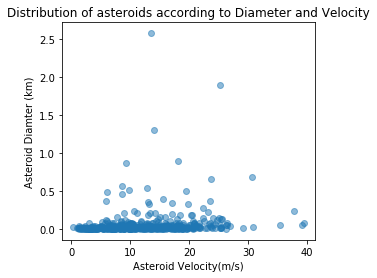

In [7]:
fig = plt.figure(1, figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(impacts['Asteroid Velocity'], impacts['Asteroid Diameter (km)'], alpha=0.5)
plt.title('Distribution of asteroids according to Diameter and Velocity')
plt.ylabel('Asteroid Diamter (km)')
plt.xlabel('Asteroid Velocity(m/s)')
plt.show()


Since Asteroid velocity is a fundamnetal paremeter in clasifying and predicting the threat and impact, it is important to visualize its average value as shown in the subsequent plot

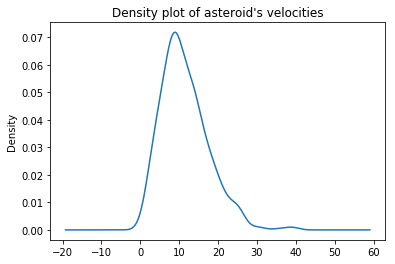

<Figure size 432x288 with 0 Axes>

In [8]:

plt.subplot(1, 1, 1)
asteroidvelo=impacts["Asteroid Velocity"]
asteroidvelo.plot.density()
plt.title("Density plot of asteroid's velocities")
plt.show()
plt.tight_layout()

Running the column above shows 682 asteroids were catalogued. Our Aim is to clasify the most dangerous asteroids from this list.

Now that we know the factors for consideration, we can start the classification process of the NEAs.
To begin with, asteroids that stay longer near the earth's orbit pose great danger. We can plot the data to see those that are near the earth's orbit. First let's know the first and last periods of the asteroids' impacts

In [9]:
impacts['Period End'].min() #First possible impact


2017

In [10]:
impacts['Period End'].max() #Last possible Impact

2880

From the dataset, the first possible impacts should have ocurred in 2017 and the last in 2880.
Therefore, we can remove all the asteroids that should have impacted the earth before 2019 from the catalogue, since they do not pose any threat.

In [11]:
impacts = impacts[impacts['Period End'].astype(int) > 2019] #Remove those before 2019 and update the dataset
impacts.shape #Display the remaining datapoints



(682, 11)

We can plot the results on a histogram to see the distribution of asteroids likely to impact the earth in the near future.


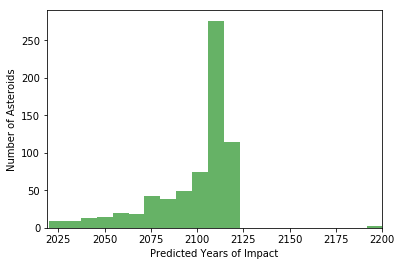

<Figure size 432x288 with 0 Axes>

In [12]:
num_bins = 100
plt.xlabel('Predicted Years of Impact') # Set the y column
plt.ylabel('Number of Asteroids')     # Set the x column
plt.xlim(2019,2200)                 # Only plot the data from 2019 to 2200
plt.hist(impacts['Period End'], num_bins, facecolor='green', alpha=0.6)  # specify the bins
plt.show()
plt.savefig('Histogram.png')   # save the graph as .png file

Looking at the output of the result, most asteroids are likely to impact the earth between 2075 and 2110. 
That is not to say that the earth is out of danger. Therefore, clasification of the asteroid based on Period reveals less signifacant information.
Next we need to use other search criteria to narrow down to potentially-dangerous asteroids to earth.
The diameter of the asteroid is a vital factor to take into consideration. Any Asteroid below 25m of diameter will blow up in the atmosphere before impacting the surface. Therefore, we can eliminate all asteroids below 0.015km (accounting for composition) from our data using the following code. 

In [13]:
impacts = impacts[impacts['Asteroid Diameter (km)'].astype(float) > 0.015] #Remove asteroids with less than 0.015km of diameter
impacts.shape # Show the remaining datapoints

(378, 11)

Running the code reduces the number of dangerous asteroids from 682 to 378.

The velocity at which an asteroid is moving is vital in whether it will survive when it reaches the earth surface or not. Asteroids with high velocity are unlikely to burn in the upper atmosphere completely before reaching the earth hence likely to impact earth surface. We can elimanate those below 7m/s as less dangerous. 

In [14]:
impacts = impacts[impacts['Asteroid Velocity'].astype(float) > 7.0] # Remove asteroids with velocity less than 7m/s
impacts.shape # print the remaining data points


(321, 11)

That reduces the potentially-dangerous asteroids from 378 to 321

#### Unsupervised Learning

Now that we have used background knowledge to elimnate some datapoints, we can now subject the dataset to analysis. The first involves unsupervised learning using K-Means algorithm. The purpose of the analysis is to classify the asteroids according to their diamter and velocity to visualize the category that consists of more asteroids with great potential hazard to earth. 

##### K-Means

In [15]:

impacts = DataFrame(impacts,columns=['Asteroid Velocity','Asteroid Diameter (km)']) #Choose the columns to use
kmeans = KMeans(n_clusters=4).fit(impacts)  # Clasify the data into four clusters
centroids = kmeans.cluster_centers_

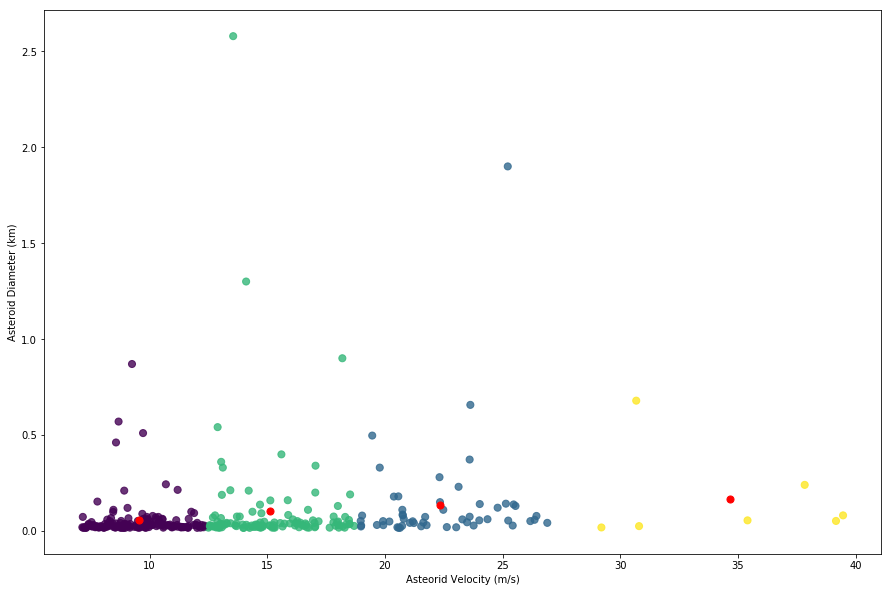

In [16]:
pl.figure(figsize=(15, 10))  # Set the size of plotting 
plt.scatter(impacts['Asteroid Velocity'], impacts['Asteroid Diameter (km)'], c= kmeans.labels_.astype(float), s=50, alpha=0.8)
plt.ylabel('Asteroid Diameter (km)')
plt.xlabel('Asteorid Velocity (m/s)')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50) #Define the attributes of the four centroids

#### Unsupervised Learning

The last step is to create an algorithm that can predict the velocity of an asteroid given its diamter. To do that, the KNN algorithm was used and the data divided into 75% for training and 25% for testing

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn
dataset=pd.read_csv('impacts.csv') # Read the initial dataset
impact = dataset.drop(['Period Start','Period End','Possible Impacts','Cumulative Impact Probability',\
                       'Asteroid Magnitude','Cumulative Palermo Scale','Maximum Palermo Scale',\
                       'Maximum Torino Scale'], axis=1) # Reduce the data to three columns of Object Name, asteroid diamter and asteroid velocity
X=impact.drop(['Object Name'],axis=1) #Assign attributes
y=impact['Object Name']               # Assign target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Split the data into training and testing
model = KNeighborsClassifier() #Call the KNN classifier model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred))   #Print the accuracy of the model
print(metrics.classification_report(y_test,y_pred))   
print(metrics.confusion_matrix(y_test,y_pred))           #Print the confusion matrix

0.0
                          precision    recall  f1-score   support

101955 Bennu (1999 RQ36)       0.00      0.00      0.00         0
                 1991 BA       0.00      0.00      0.00         1
                 1991 VG       0.00      0.00      0.00         1
                1993 HP1       0.00      0.00      0.00         0
                 1993 UA       0.00      0.00      0.00         0
                 1994 GK       0.00      0.00      0.00         1
                 1994 GV       0.00      0.00      0.00         1
                1996 TC1       0.00      0.00      0.00         1
               1997 TC25       0.00      0.00      0.00         0
               1997 UA11       0.00      0.00      0.00         0
               1998 DK36       0.00      0.00      0.00         0
               1999 RZ31       0.00      0.00      0.00         1
                2000 LG6       0.00      0.00      0.00         0
               2000 SB45       0.00      0.00      0.00         0
     

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


/home/osoro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/osoro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/osoro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/osoro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/hom